In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\dell\\Desktop\\Machine Learning\\Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df['User ID'].value_counts().head()

15709183    1
15589715    1
15779581    1
15611191    1
15724858    1
Name: User ID, dtype: int64

In [7]:
df['Gender'].value_counts().head()

Female    204
Male      196
Name: Gender, dtype: int64

In [9]:
df['Age'].value_counts().head()

35    32
37    20
41    16
42    16
26    16
Name: Age, dtype: int64

In [10]:
df['EstimatedSalary'].value_counts().head()

72000    12
80000    11
79000    10
71000     9
75000     9
Name: EstimatedSalary, dtype: int64

In [11]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


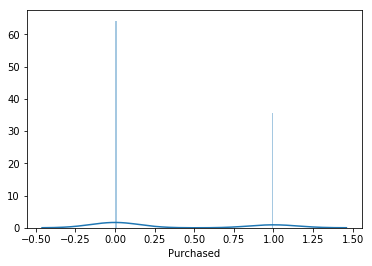

In [12]:
sns.distplot(df['Purchased'],bins=100)

In [13]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

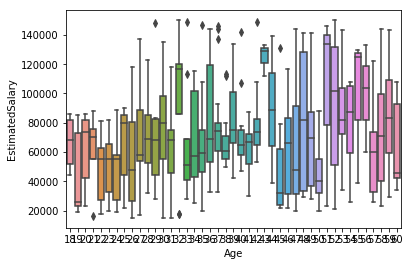

In [14]:
sns.boxplot(x="Age",y="EstimatedSalary",data=df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [16]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [17]:
df.max()

User ID            15815236
Gender                 Male
Age                      60
EstimatedSalary      150000
Purchased                 1
dtype: object

In [21]:
len(df[df['Purchased']==1])

143

In [22]:
type(df['Purchased'])

pandas.core.series.Series

In [23]:
df[df['EstimatedSalary']==72000]

,User ID,Gender,Age,EstimatedSalary,Purchased
38,15671766,Female,26,72000,0
105,15801658,Male,21,72000,0
121,15741049,Male,37,72000,0
174,15644296,Female,34,72000,0
188,15674206,Male,35,72000,0
228,15691808,Female,40,72000,0
244,15586996,Female,41,72000,0
256,15609637,Female,41,72000,0
263,15767681,Female,35,72000,0
326,15713463,Male,41,72000,0


In [25]:
df[['User ID','Age','EstimatedSalary']][df['EstimatedSalary']==72000]

,User ID,Age,EstimatedSalary
38,15671766,26,72000
105,15801658,21,72000
121,15741049,37,72000
174,15644296,34,72000
188,15674206,35,72000
228,15691808,40,72000
244,15586996,41,72000
256,15609637,41,72000
263,15767681,35,72000
326,15713463,41,72000


In [28]:
df['Age'][df['Purchased']==1]

7      32
16     47
17     45
18     46
19     48
20     45
21     47
22     48
23     45
24     46
25     47
26     49
27     47
31     27
48     30
63     32
75     34
85     31
97     28
103    33
137    30
146    27
159    32
160    32
168    29
182    32
202    39
204    58
206    55
208    40
       ..
360    43
361    53
362    47
364    42
365    59
366    58
367    46
369    54
370    60
371    60
373    59
375    46
378    41
379    58
381    48
382    44
383    49
384    57
385    56
386    49
388    47
389    48
390    48
391    47
392    45
393    60
395    46
396    51
397    50
399    49
Name: Age, Length: 143, dtype: int64

In [32]:
x=df.drop(['User ID','Purchased'],axis=1)
y=df['Purchased']

In [49]:
x=pd.concat([x,pd.get_dummies(df['Gender'],drop_first=True)],axis=1)

In [50]:
x.head()

,Gender,Age,EstimatedSalary,Male
0,Male,19,19000,1
1,Male,35,20000,1
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,1


In [51]:
x=x.drop(['Gender'],axis=1)

In [52]:
x.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [29]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
model=DecisionTreeClassifier().fit(x_train,y_train)

In [56]:
pred=model.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

In [58]:
print(confusion_matrix(y_test,pred))

[[47  5]
 [ 8 20]]


In [59]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.85      0.90      0.88        52
          1       0.80      0.71      0.75        28

avg / total       0.84      0.84      0.84        80

